# Assignment #1

Author: Isaia Pacheco

Collaborators: None

Integrity Statement: Did you use an LLM to write any of the code in your assignment? (Y/N): Yes, for the formater for the axis in question three and used to create mappings in question four.

# Instructions

You are permitted to work with a partner in the class to complete your assignment, but no more than one partner. However, every student must submit their own copy of the assignment, and must list your collaborators.

You should refer to your textbook and posted course materials as resources. You are also allowed to use the documentation for python, pandas, matplotlib, and seaborn. You may not use other online resources or LLMs for this assignment.

You will be graded based on (1) correctness, (2) completeness, (3) documentation, and (4) overall readability of your notebook. The assignment will be worth a total of 100 points in the Homework category (15% of your grade).

**Submission and Deadline: This assignment must be submitted on Canvas before class begins on Wednesday, September 17.**

You must complete all of the steps below:

1. Organize your project in a project folder (or repo) with three subfolders: src, data, and presentations. Place the provided dataset in the data folder, and the two provided notebooks in the src folder.
2. Use a python virtual environment, install the libraries you use, and create a requirements.txt file (using `pip freeze`)
3. Open and read through the provided data cleaning notebook to understand the cleaning process and all of its operations. (Fair game).
4. Run the separate notebook provided for cleaning the CDC data. It should create a new file. You do not need to edit that notebook at all, and only need to run it once. All coding will take place in this notebook.

The rest of the assignment should be completed in this notebook:

1. Read in the clean data in from the provided csv file and write code to examine it and understand it
2. Write code to determine which cancer site had the highest incidence of new cases for females in each individual year included in the dataset, and present your results
3. Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)
4. Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each individual cancer site (many lines)
5. Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females
6. Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000
7. For each cancer site and each year, determine whether males or females had the higher incidence (hint: groupby)
8. Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined
9. Add your full name and the full names of your collaborator (if any) at the top of this document. Answer the integrity statement. 
10. Submit this notebook on Canvas together with the requirements.txt file

**NOTE:** For each plot, add a descriptive title and label the axes appropriately, and remark on any observations that you make.

**HINT #1:** Most problems can be solved by some combination of filtering and/or groupby before aggregating (e.g., taking the max) and plotting.

**HINT #2:** You can solve these problems in any order, so do the ones you find easiest first and the rest will start to feel easier.

**Useful Documentation**
- Pandas general documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Pandas dataframe reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
- Pandas Copy-on-Write: https://pandas.pydata.org/docs/user_guide/copy_on_write.html
- Pandas missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Pandas split-apply-combine (groupby, agg): https://pandas.pydata.org/docs/user_guide/groupby.html 

- Matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html
- Seaborn documentation: https://seaborn.pydata.org/


# Imports and CoW

In [217]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime
import os

In [218]:
pd.options.mode.copy_on_write = True  # will be the default in pandas 3.0, best to enforce it

# 1. Read in Data

In [219]:
CWD = Path.cwd()
ASSIGNMENT1 = CWD.parent
DATA = ASSIGNMENT1.joinpath('data')
FILE = 'clean_cdc_cancer.csv'
PATH = DATA.joinpath(FILE)

In [220]:
if PATH.exists():
    print('Found the data file')
else:
    raise Exception('Could not find that file', PATH)

Found the data file


In [221]:
cancer_df = pd.read_csv(PATH)

In [222]:
cancer_df.shape

(4631, 12)

4633 (lines in files) - 2 (line for the header and the empty row) = 46331, 12 (column labels), the shape is what we expect.

In [223]:
cancer_df.columns

Index(['Cancer Sites', 'Cancer Sites Code', 'Year', 'Sex', 'Count',
       'Population', 'Age-Adjusted Rate',
       'Age-Adjusted Rate Lower 95% Confidence Interval',
       'Age-Adjusted Rate Upper 95% Confidence Interval', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval'],
      dtype='object')

In [224]:
AGE_ADJUSTED_RATE = 'Age-Adjusted Rate'
AGE_ADJUSTED_RATE_LCI = 'Age-Adjusted Rate Lower 95% Confidence Interval'
AGE_ADJUSTED_RATE_UCI = 'Age-Adjusted Rate Upper 95% Confidence Interval'
CANCER_SITES = 'Cancer Sites'
CANCER_SITES_CODE = 'Cancer Sites Code'
COUNT = 'Count'
CRUDE_RATE = 'Crude Rate'
CRUDE_RATE_LCI = 'Crude Rate Lower 95% Confidence Interval'
CRUDE_RATE_UCI = 'Crude Rate Upper 95% Confidence Interval'
POPULATION = 'Population'
SEX = 'Sex'
YEAR = 'Year'

# 2. Incidence for Females Each Year

Write code to determine which cancer site had the highest incidence of new cases for females in each year 1999-2022 (hint: filter then groupby then agg)

In [225]:
MALE = 'M'
FEMALE = 'F'
ALL_INVASIVE_CANCER_SITES_COMBINED = 'All Invasive Cancer Sites Combined'
MAX_COUNT = 'Max(Count)'

In [226]:
females_cases_1999_to_2022_df = cancer_df[
    (cancer_df[SEX] == FEMALE) &
    (1999 <= cancer_df[YEAR]) &
    (cancer_df[YEAR] <= 2022)
    ].groupby([SEX,YEAR,CANCER_SITES])[COUNT].max().reset_index(name=MAX_COUNT)
females_cases_1999_to_2022_df

,Sex,Year,Cancer Sites,Max(Count)
0,F,1999,Acute Lymphocytic Leukemia,1652
1,F,1999,Acute Monocytic Leukemia,249
2,F,1999,Acute Myeloid Leukemia,4648
3,F,1999,"Aleukemic, Subleukemic and NOS",649
4,F,1999,All Invasive Cancer Sites Combined,631741
...,...,...,...,...
2347,F,2022,"Urinary Bladder, invasive and in situ",18023
2348,F,2022,Urinary System,45260
2349,F,2022,"Uterus, NOS",2080
2350,F,2022,Vagina,1394


In [227]:
females_cases_1999_to_2022_df = females_cases_1999_to_2022_df.loc[
    females_cases_1999_to_2022_df.groupby([YEAR])[MAX_COUNT].idxmax()
].reset_index(drop=True)
females_cases_1999_to_2022_df

,Sex,Year,Cancer Sites,Max(Count)
0,F,1999,All Invasive Cancer Sites Combined,631741
1,F,2000,All Invasive Cancer Sites Combined,641968
2,F,2001,All Invasive Cancer Sites Combined,662313
3,F,2002,All Invasive Cancer Sites Combined,667753
4,F,2003,All Invasive Cancer Sites Combined,676099
5,F,2004,All Invasive Cancer Sites Combined,687327
6,F,2005,All Invasive Cancer Sites Combined,702854
7,F,2006,All Invasive Cancer Sites Combined,714800
8,F,2007,All Invasive Cancer Sites Combined,730953
9,F,2008,All Invasive Cancer Sites Combined,749831


In [228]:
females_cases_1999_to_2022_df.loc[females_cases_1999_to_2022_df[MAX_COUNT].idxmax()]

Sex                                              F
Year                                          2021
Cancer Sites    All Invasive Cancer Sites Combined
Max(Count)                                  918189
Name: 22, dtype: object

All invasive cancer sites is not very informative so Im going to filter out 'All Invasive Cancer Sites Combined'

In [229]:
females_cases_1999_to_2022_df = cancer_df[
    (cancer_df[SEX] == FEMALE) &
    (1999 <= cancer_df[YEAR]) &
    (cancer_df[YEAR] <= 2022) &
    (cancer_df[CANCER_SITES] != ALL_INVASIVE_CANCER_SITES_COMBINED)
    ].groupby([SEX,YEAR,CANCER_SITES])[COUNT].max().reset_index(name=MAX_COUNT)

females_cases_1999_to_2022_df

,Sex,Year,Cancer Sites,Max(Count)
0,F,1999,Acute Lymphocytic Leukemia,1652
1,F,1999,Acute Monocytic Leukemia,249
2,F,1999,Acute Myeloid Leukemia,4648
3,F,1999,"Aleukemic, Subleukemic and NOS",649
4,F,1999,"Anus, Anal Canal and Anorectum",2273
...,...,...,...,...
2323,F,2022,"Urinary Bladder, invasive and in situ",18023
2324,F,2022,Urinary System,45260
2325,F,2022,"Uterus, NOS",2080
2326,F,2022,Vagina,1394


In [230]:
females_cases_1999_to_2022_df = females_cases_1999_to_2022_df.loc[
    females_cases_1999_to_2022_df.groupby([YEAR])[MAX_COUNT].idxmax()
].reset_index(drop=True)
females_cases_1999_to_2022_df

,Sex,Year,Cancer Sites,Max(Count)
0,F,1999,Female Breast,198589
1,F,2000,Female Breast,198710
2,F,2001,Female Breast,201357
3,F,2002,Female Breast,200584
4,F,2003,Female Breast,195513
5,F,2004,Female Breast,196651
6,F,2005,Female Breast,199812
7,F,2006,Female Breast,204445
8,F,2007,Female Breast,210783
9,F,2008,Female Breast,216685


In [231]:
females_cases_1999_to_2022_df.loc[females_cases_1999_to_2022_df[MAX_COUNT].idxmax()]

Sex                         F
Year                     2021
Cancer Sites    Female Breast
Max(Count)             282273
Name: 22, dtype: object

Female breast cancer has the highest number of incidence of cancer in 1999-2022, highest in 2021 at 282,273 cases

# 3. Line plots for male and female, all sites

Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)

In [232]:
def international_system_of_units_metrics(number, _):
    """
    Formats and converts an integer to SI unit metrics
    Args:
        number: The integer to convert to as is, kilo, mega, or giga
    """
    if number < 1000: #0 - 999
        return f'{number:.2f}'
    elif number < 1000000: #1,000 - 999,999
        return f'{number / 1000:.2f}K'
    elif number < 1000000000: #1,000,000 - 999,999,999
        return f'{number / 1000000:.2f}M'
    else: # +999,999,999
        return f'{number / 1000000000:.2f}G'

FORMATTER = FuncFormatter(international_system_of_units_metrics)

In [233]:
PRESENTATIONS = ASSIGNMENT1.joinpath('presentations')
if not os.path.exists(PRESENTATIONS):
    os.makedirs(PRESENTATIONS)

def save_plot(fig, question_number):
    """
    Saves a matplotlib/seaborn figure with a unique filename
    using question number + timestamp.

    Args:
        fig: The matplotlib figure object to save.
        question_number: The question index/ID.
    """
    timestamp = datetime.now().strftime("%m-%d-%Y_%H-%M-%S")
    file = f"plot_q{question_number}_{timestamp}.png"
    path = PRESENTATIONS.joinpath(file)
    fig.savefig(path, dpi=300, bbox_inches="tight")

In [234]:
SUM_COUNT = 'Sum(Count)'

In [235]:
all_invasive_sites_df = cancer_df[
    cancer_df[CANCER_SITES] == ALL_INVASIVE_CANCER_SITES_COMBINED
    ].groupby([CANCER_SITES, YEAR, SEX])[COUNT].sum().reset_index(name=SUM_COUNT)
all_invasive_sites_df.head()

,Cancer Sites,Year,Sex,Sum(Count)
0,All Invasive Cancer Sites Combined,1999,F,631741
1,All Invasive Cancer Sites Combined,1999,M,672530
2,All Invasive Cancer Sites Combined,2000,F,641968
3,All Invasive Cancer Sites Combined,2000,M,690598
4,All Invasive Cancer Sites Combined,2001,F,662313


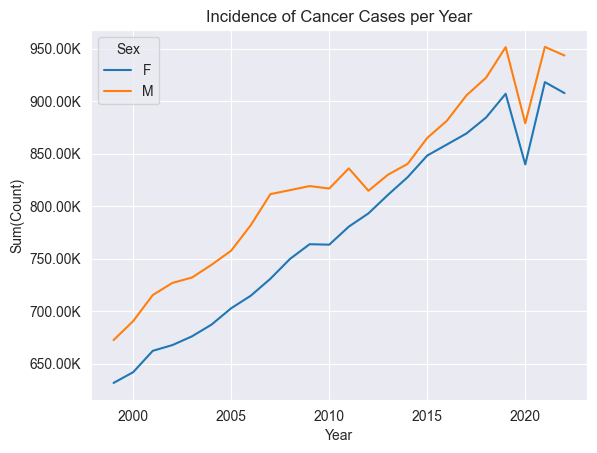

In [236]:
plot = sns.lineplot(data=all_invasive_sites_df, x=YEAR, y=SUM_COUNT, hue=SEX)
plot.set_title(label='Incidence of Cancer Cases per Year')
plot.yaxis.set_major_formatter(FORMATTER)
save_plot(plot.figure, question_number=3)

Male cancer cases in 1999-2022 appear be greater than female cancer cases in 1999-2022.

# 4. Line plots for cancer sites

 Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each cancer site (many lines)

In [237]:
yearly_site_for_females_df = cancer_df[
    (cancer_df[SEX] == FEMALE)
].groupby(
    [YEAR, CANCER_SITES, SEX]
)[COUNT].sum().reset_index(name=SUM_COUNT)

yearly_site_for_females_df.head(3)

,Year,Cancer Sites,Sex,Sum(Count)
0,1999,Acute Lymphocytic Leukemia,F,1652
1,1999,Acute Monocytic Leukemia,F,249
2,1999,Acute Myeloid Leukemia,F,4648


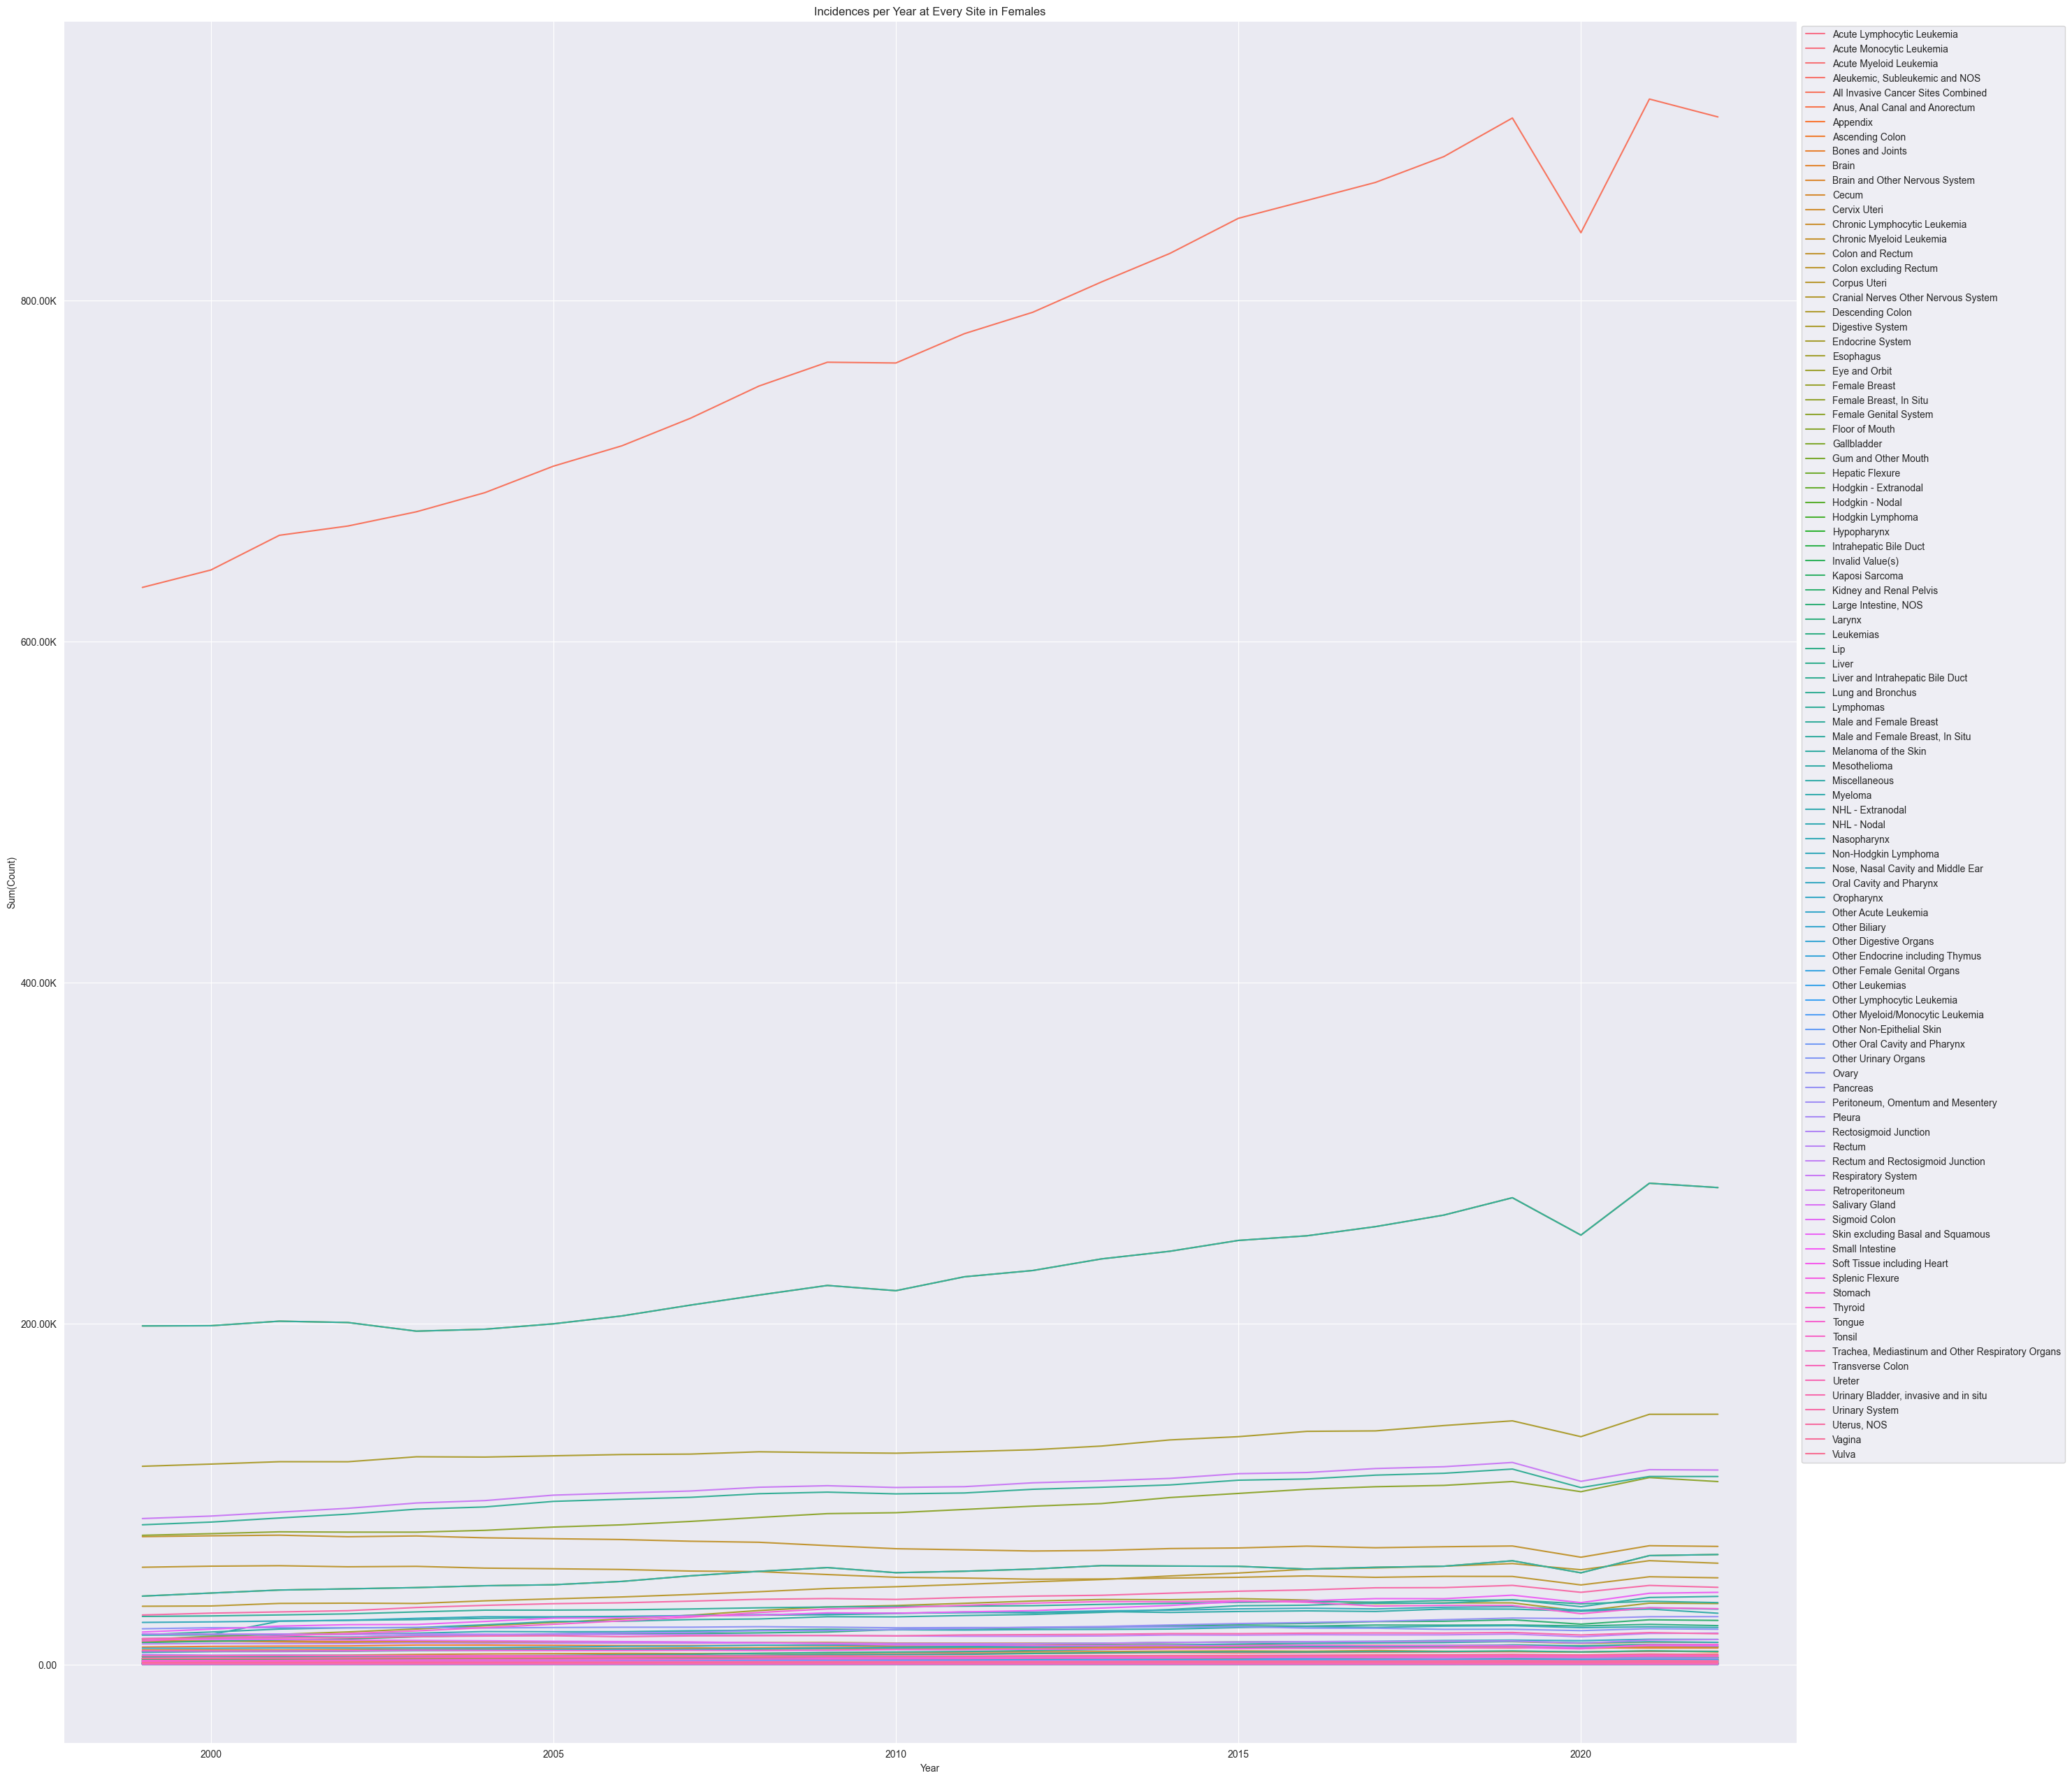

In [238]:
plt.figure(figsize=(32, 32))
plot = sns.lineplot(yearly_site_for_females_df, x=YEAR, y=SUM_COUNT, hue=CANCER_SITES)
plot.yaxis.set_major_formatter(FORMATTER)
plot.set_title('Incidences per Year at Every Site in Females')
plot.axes.legend(bbox_to_anchor=(1, 1, 0, 0))
save_plot(plot.figure, question_number=4)

There is a cluster of data between 0-200k and there is a gap from 225k-600k, and too many lines for where the cluster is. Why is that?

In [239]:
cancer_df[CANCER_SITES].sort_values().unique()

array(['Acute Lymphocytic Leukemia', 'Acute Monocytic Leukemia',
       'Acute Myeloid Leukemia', 'Aleukemic, Subleukemic and NOS',
       'All Invasive Cancer Sites Combined',
       'Anus, Anal Canal and Anorectum', 'Appendix', 'Ascending Colon',
       'Bones and Joints', 'Brain', 'Brain and Other Nervous System',
       'Cecum', 'Cervix Uteri', 'Chronic Lymphocytic Leukemia',
       'Chronic Myeloid Leukemia', 'Colon and Rectum',
       'Colon excluding Rectum', 'Corpus Uteri',
       'Cranial Nerves Other Nervous System', 'Descending Colon',
       'Digestive System', 'Endocrine System', 'Esophagus',
       'Eye and Orbit', 'Female Breast', 'Female Breast, In Situ',
       'Female Genital System', 'Floor of Mouth', 'Gallbladder',
       'Gum and Other Mouth', 'Hepatic Flexure', 'Hodgkin - Extranodal',
       'Hodgkin - Nodal', 'Hodgkin Lymphoma', 'Hypopharynx',
       'Intrahepatic Bile Duct', 'Invalid Value(s)', 'Kaposi Sarcoma',
       'Kidney and Renal Pelvis', 'Large Intestine

In [240]:
cancer_df[CANCER_SITES].nunique()

105

There are way too many cancer sites to compare. Cancer sites values can be reduced. For example, Ureter, Urinary Bladder, Vagina, Vulva can be consolidated into a reproductive organ system. I will attempt to consolidate the values to system sites, which is more reasonable to compare and it may still give intuition where cancer incidences are occurring. The following is how I will bucket the sites

### Proposed Cancer Sites Grouped by System

#### Blood & Lymphatic system
- Acute Lymphocytic Leukemia
- Acute Monocytic Leukemia
- Acute Myeloid Leukemia
- Aleukemic, Subleukemic and NOS
- Chronic Lymphocytic Leukemia
- Chronic Myeloid Leukemia
- Hodgkin - Extranodal
- Hodgkin - Nodal
- Hodgkin Lymphoma
- Kaposi Sarcoma
- Leukemias
- Lymphomas
- Myeloma
- NHL - Extranodal
- NHL - Nodal
- Non-Hodgkin Lymphoma
- Other Acute Leukemia
- Other Leukemias
- Other Lymphocytic Leukemia
- Other Myeloid/Monocytic Leukemia

#### Digestive system
- Anus, Anal Canal and Anorectum
- Appendix
- Ascending Colon
- Cecum
- Colon and Rectum
- Colon excluding Rectum
- Descending Colon
- Digestive System
- Esophagus
- Floor of Mouth
- Gallbladder
- Gum and Other Mouth
- Hepatic Flexure
- Hypopharynx
- Intrahepatic Bile Duct
- Large Intestine, NOS
- Lip
- Liver
- Liver and Intrahepatic Bile Duct
- Nasopharynx
- Oral Cavity and Pharynx
- Oropharynx
- Other Biliary
- Other Digestive Organs
- Other Oral Cavity and Pharynx
- Pancreas
- Peritoneum, Omentum and Mesentery
- Rectosigmoid Junction
- Rectum
- Rectum and Rectosigmoid Junction
- Retroperitoneum
- Salivary Gland
- Sigmoid Colon
- Small Intestine
- Splenic Flexure
- Stomach
- Tongue
- Tonsil
- Transverse Colon

#### Endocrine system
- Endocrine System
- Other Endocrine including Thymus
- Thyroid

#### Integumentary system
- Melanoma of the Skin
- Other Non-Epithelial Skin
- Skin excluding Basal and Squamous

#### Miscellaneous
- All Invasive Cancer Sites Combined
- Invalid Value(s)
- Miscellaneous

#### Muscular system
- Soft Tissue including Heart

#### Nervous system
- Brain
- Brain and Other Nervous System
- Cranial Nerves Other Nervous System
- Eye and Orbit

#### Reproductive system
- Cervix Uteri
- Corpus Uteri
- Female Breast
- Female Breast, In Situ
- Female Genital System
- Male Breast
- Male Breast, In Situ
- Male Genital System
- Male and Female Breast
- Male and Female Breast, In Situ
- Other Female Genital Organs
- Other Male Genital Organs
- Ovary
- Penis
- Prostate
- Testis
- Uterus, NOS
- Vagina
- Vulva

#### Respiratory system
- Larynx
- Lung and Bronchus
- Mesothelioma
- Nose, Nasal Cavity and Middle Ear
- Pleura
- Respiratory System
- Trachea, Mediastinum and Other Respiratory Organs

#### Skeletal system
- Bones and Joints

#### Urinary system
- Kidney and Renal Pelvis
- Other Urinary Organs
- Ureter
- Urinary Bladder, invasive and in situ
- Urinary System

In [241]:
INTEGUMENTARY = 'Integumentary'
SKELETAL = 'Skeletal'
MUSCULAR = 'Muscular'
NERVOUS = 'Nervous'
ENDOCRINE = 'Endocrine'
BLOOD_LYMPHATIC = 'Blood & Lymphatic'
RESPIRATORY = 'Respiratory'
DIGESTIVE = 'Digestive'
URINARY = 'Urinary'
REPRODUCTIVE = 'Reproductive'
MISC = 'Miscellaneous'

In [242]:
system_site_map = {
    'Acute Lymphocytic Leukemia': BLOOD_LYMPHATIC,  #1
    'Acute Monocytic Leukemia': BLOOD_LYMPHATIC,  #2
    'Acute Myeloid Leukemia': BLOOD_LYMPHATIC,  #3
    'Aleukemic, Subleukemic and NOS': BLOOD_LYMPHATIC,  #4
    'All Invasive Cancer Sites Combined': MISC,  #5
    'Anus, Anal Canal and Anorectum': DIGESTIVE,  #6
    'Appendix': DIGESTIVE,  #7
    'Ascending Colon': DIGESTIVE,  #8
    'Bones and Joints': SKELETAL,  #9
    'Brain': NERVOUS,  #10
    'Brain and Other Nervous System': NERVOUS,  #11
    'Cecum': DIGESTIVE,  #12
    'Cervix Uteri': REPRODUCTIVE,  #13
    'Chronic Lymphocytic Leukemia': BLOOD_LYMPHATIC,  #14
    'Chronic Myeloid Leukemia': BLOOD_LYMPHATIC,  #15
    'Colon and Rectum': DIGESTIVE,  #16
    'Colon excluding Rectum': DIGESTIVE,  #17
    'Corpus Uteri': REPRODUCTIVE,  #18
    'Cranial Nerves Other Nervous System': NERVOUS,  #19
    'Descending Colon': DIGESTIVE,  #20
    'Digestive System': DIGESTIVE,  #21
    'Endocrine System': ENDOCRINE,  #22
    'Esophagus': DIGESTIVE,  #23
    'Eye and Orbit': NERVOUS,  #24   # sensory organ → nervous
    'Female Breast': REPRODUCTIVE,  #25
    'Female Breast, In Situ': REPRODUCTIVE,  #26
    'Female Genital System': REPRODUCTIVE,  #27
    'Floor of Mouth': DIGESTIVE,  #28
    'Gallbladder': DIGESTIVE,  #29
    'Gum and Other Mouth': DIGESTIVE,  #30
    'Hepatic Flexure': DIGESTIVE,  #31
    'Hodgkin - Extranodal': BLOOD_LYMPHATIC,  #32
    'Hodgkin - Nodal': BLOOD_LYMPHATIC,  #33
    'Hodgkin Lymphoma': BLOOD_LYMPHATIC,  #34
    'Hypopharynx': DIGESTIVE,  #35
    'Intrahepatic Bile Duct': DIGESTIVE,  #36
    'Invalid Value(s)': MISC,  #37
    'Kaposi Sarcoma': BLOOD_LYMPHATIC,  #38
    'Kidney and Renal Pelvis': URINARY,  #39
    'Large Intestine, NOS': DIGESTIVE,  #40
    'Larynx': RESPIRATORY,  #41
    'Leukemias': BLOOD_LYMPHATIC,  #42
    'Lip': DIGESTIVE,  #43
    'Liver': DIGESTIVE,  #44
    'Liver and Intrahepatic Bile Duct': DIGESTIVE,  #45
    'Lung and Bronchus': RESPIRATORY,  #46
    'Lymphomas': BLOOD_LYMPHATIC,  #47
    'Male Breast': REPRODUCTIVE,  #48
    'Male Breast, In Situ': REPRODUCTIVE,  #49
    'Male Genital System': REPRODUCTIVE,  #50
    'Male and Female Breast': REPRODUCTIVE,  #51
    'Male and Female Breast, In Situ': REPRODUCTIVE,  #52
    'Melanoma of the Skin': INTEGUMENTARY,  #53
    'Mesothelioma': RESPIRATORY,  #54
    'Miscellaneous': MISC,  #55
    'Myeloma': BLOOD_LYMPHATIC,  #56
    'NHL - Extranodal': BLOOD_LYMPHATIC,  #57
    'NHL - Nodal': BLOOD_LYMPHATIC,  #58
    'Nasopharynx': DIGESTIVE,  #59
    'Non-Hodgkin Lymphoma': BLOOD_LYMPHATIC,  #60
    'Nose, Nasal Cavity and Middle Ear': RESPIRATORY,  #61
    'Oral Cavity and Pharynx': DIGESTIVE,  #62
    'Oropharynx': DIGESTIVE,  #63
    'Other Acute Leukemia': BLOOD_LYMPHATIC,  #64
    'Other Biliary': DIGESTIVE,  #65
    'Other Digestive Organs': DIGESTIVE,  #66
    'Other Endocrine including Thymus': ENDOCRINE,  #67
    'Other Female Genital Organs': REPRODUCTIVE,  #68
    'Other Leukemias': BLOOD_LYMPHATIC,  #69
    'Other Lymphocytic Leukemia': BLOOD_LYMPHATIC,  #70
    'Other Male Genital Organs': REPRODUCTIVE,  #71
    'Other Myeloid/Monocytic Leukemia': BLOOD_LYMPHATIC,  #72
    'Other Non-Epithelial Skin': INTEGUMENTARY,  #73
    'Other Oral Cavity and Pharynx': DIGESTIVE,  #74
    'Other Urinary Organs': URINARY,  #75
    'Ovary': REPRODUCTIVE,  #76
    'Pancreas': DIGESTIVE,  #77
    'Penis': REPRODUCTIVE,  #78
    'Peritoneum, Omentum and Mesentery': DIGESTIVE,  #79
    'Pleura': RESPIRATORY,  #80
    'Prostate': REPRODUCTIVE,  #81
    'Rectosigmoid Junction': DIGESTIVE,  #82
    'Rectum': DIGESTIVE,  #83
    'Rectum and Rectosigmoid Junction': DIGESTIVE,  #84
    'Respiratory System': RESPIRATORY,  #85
    'Retroperitoneum': DIGESTIVE,  #86
    'Salivary Gland': DIGESTIVE,  #87
    'Sigmoid Colon': DIGESTIVE,  #88
    'Skin excluding Basal and Squamous': INTEGUMENTARY,  #89
    'Small Intestine': DIGESTIVE,  #90
    'Soft Tissue including Heart': MUSCULAR,  #91
    'Splenic Flexure': DIGESTIVE,  #92
    'Stomach': DIGESTIVE,  #93
    'Testis': REPRODUCTIVE,  #94
    'Thyroid': ENDOCRINE,  #95
    'Tongue': DIGESTIVE,  #96
    'Tonsil': DIGESTIVE,  #97
    'Trachea, Mediastinum and Other Respiratory Organs': RESPIRATORY,  #98
    'Transverse Colon': DIGESTIVE,  #99
    'Ureter': URINARY,  #100
    'Urinary Bladder, invasive and in situ': URINARY,  #101
    'Urinary System': URINARY,  #102
    'Uterus, NOS': REPRODUCTIVE,  #103
    'Vagina': REPRODUCTIVE,  #104
    'Vulva': REPRODUCTIVE,  #105
}

In [243]:
CANCER_SYSTEM_SITES = 'Cancer System Sites'
cancer_df[CANCER_SYSTEM_SITES] = cancer_df[CANCER_SITES].map(system_site_map)

In [244]:
yearly_system_site_for_females_df = cancer_df[
    (cancer_df[SEX] == FEMALE)
].groupby(
    [YEAR, CANCER_SYSTEM_SITES, SEX]
)[COUNT].sum().reset_index(name=SUM_COUNT)

yearly_system_site_for_females_df.head(3)

,Year,Cancer System Sites,Sex,Sum(Count)
0,1999,Blood & Lymphatic,F,124111
1,1999,Digestive,F,406034
2,1999,Endocrine,F,29382


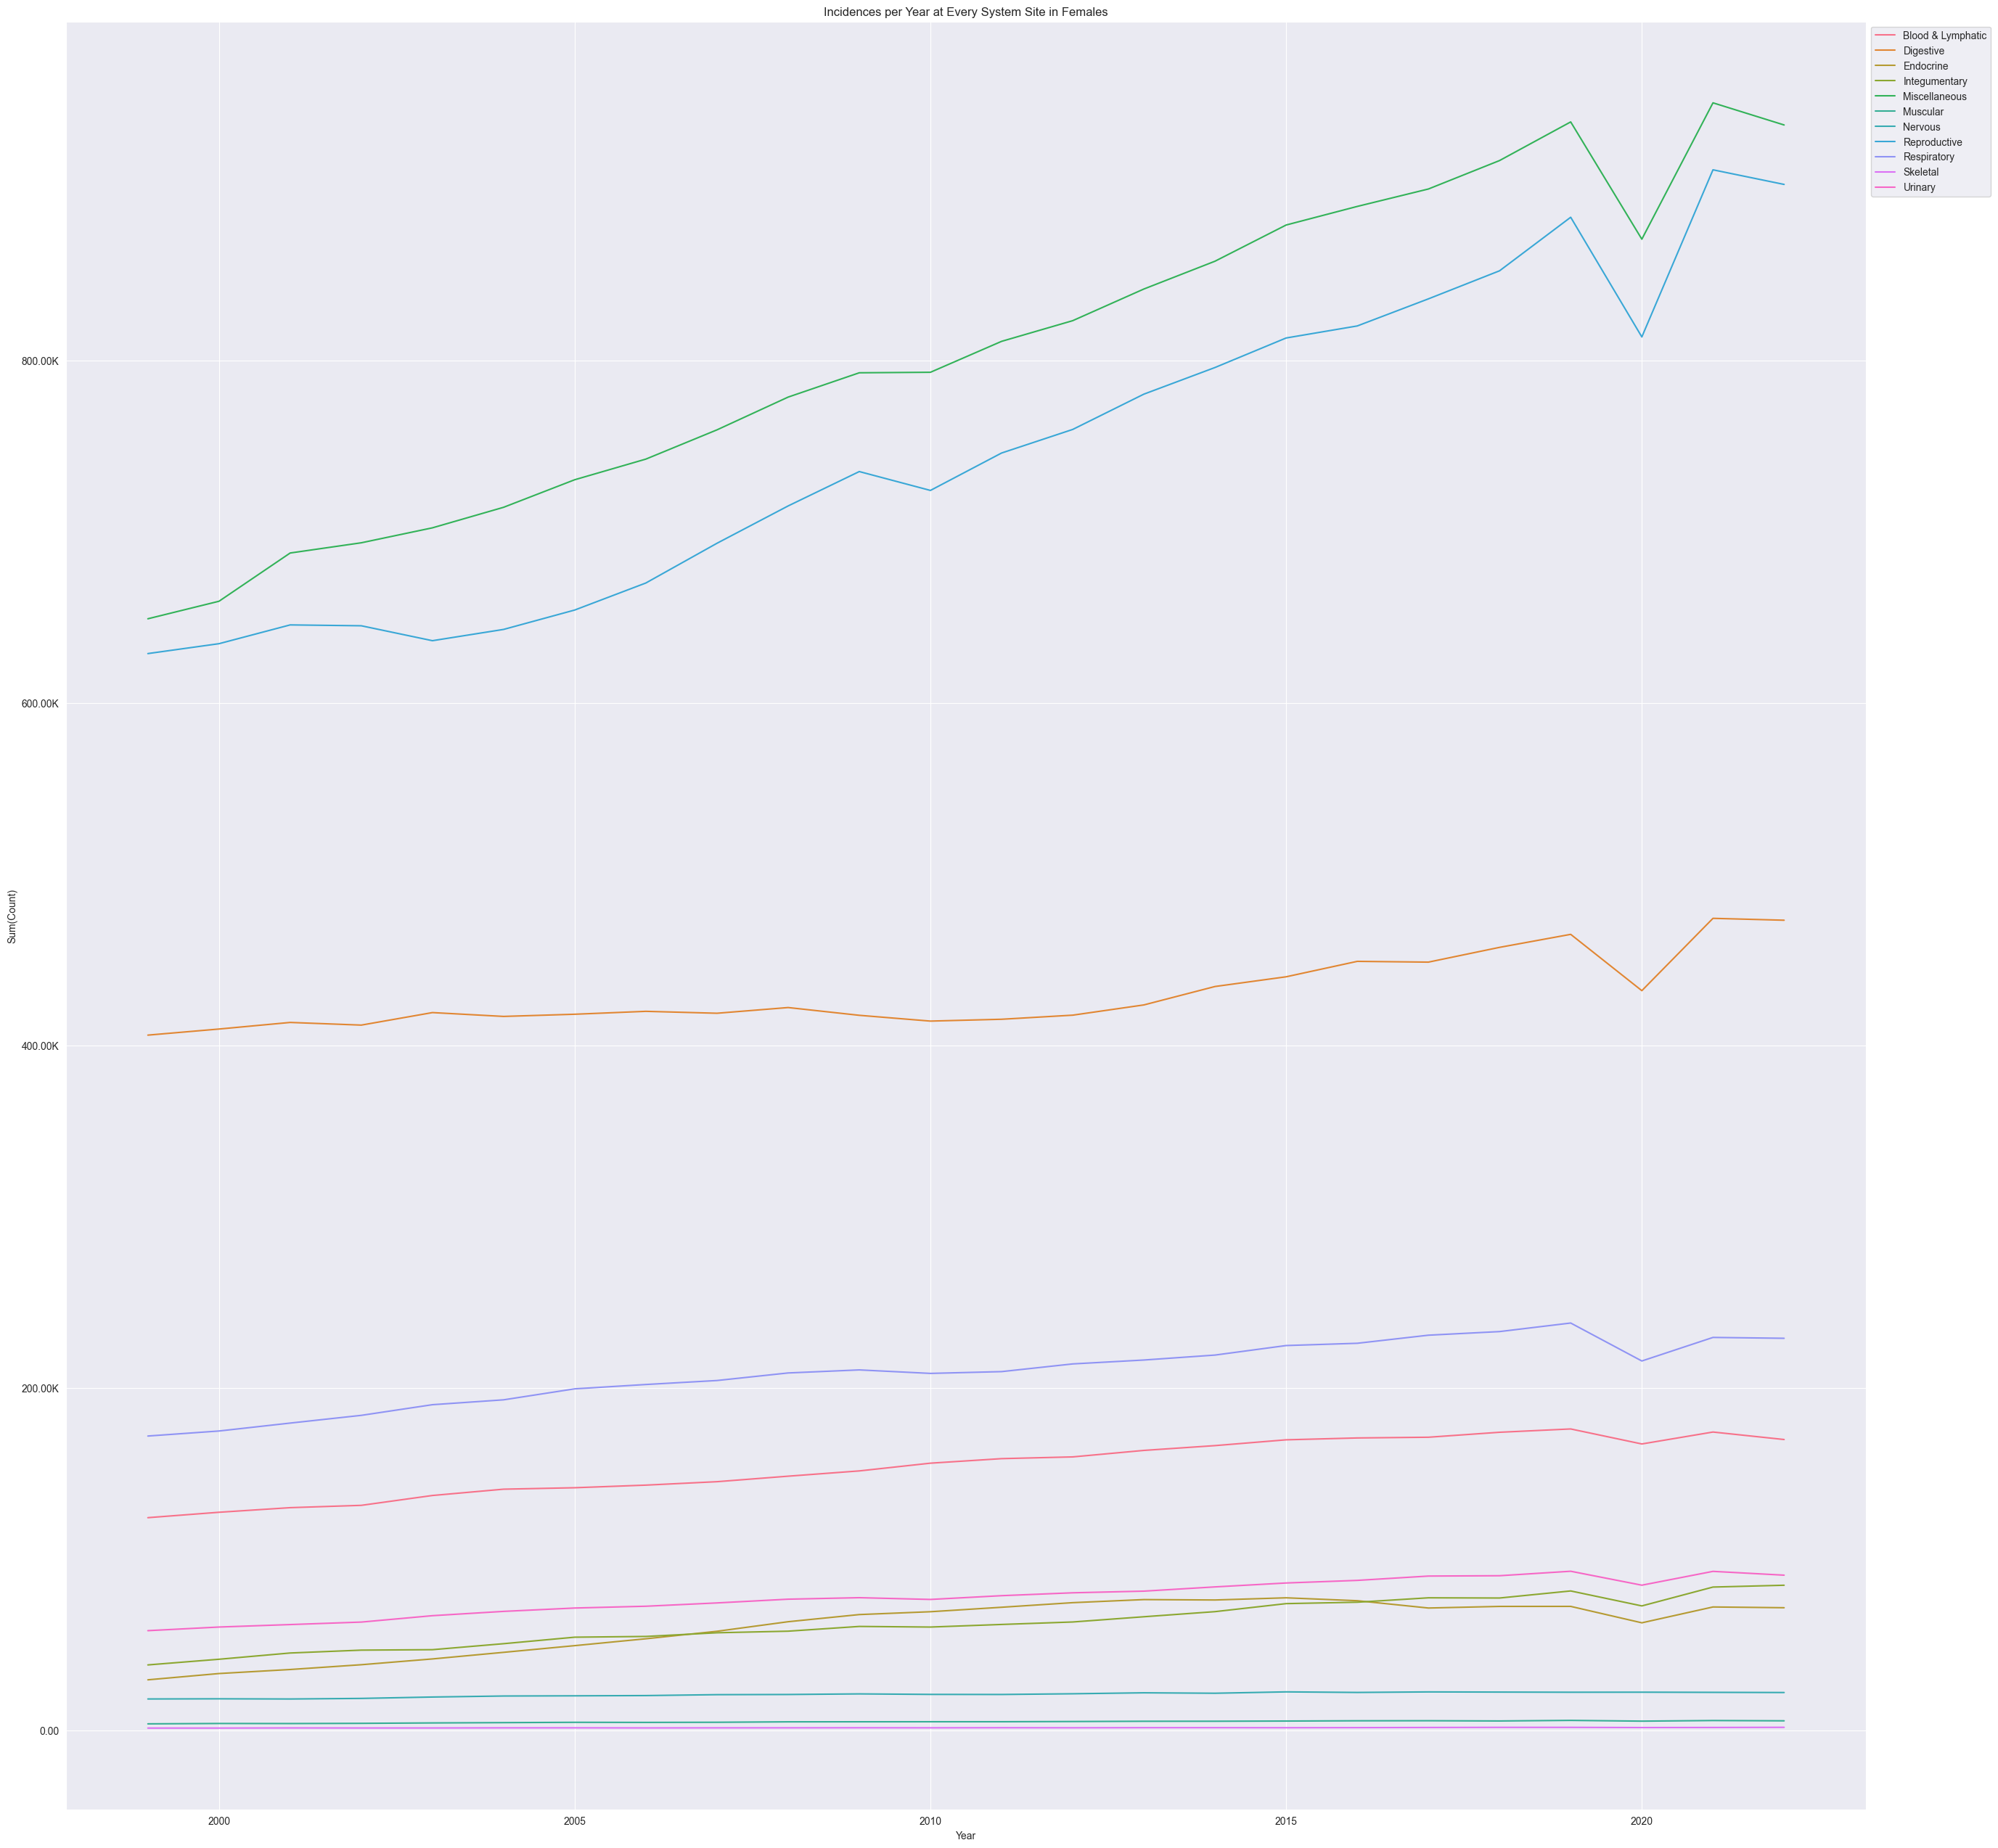

In [245]:
plt.figure(figsize=(32, 32))
plot = sns.lineplot(yearly_system_site_for_females_df, x=YEAR, y=SUM_COUNT, hue=CANCER_SYSTEM_SITES)
plot.yaxis.set_major_formatter(FORMATTER)
plot.set_title('Incidences per Year at Every System Site in Females')
plot.axes.legend(bbox_to_anchor=(1, 1, 0, 0))
save_plot(plot.figure, question_number=4)

The plot is shows most cancer cases are found in the endocrine and digestion system and the skeletal and muscular systems are lowest cases amongst our groupings. There was an upwards trend during 1999-2022 for cancer cases, some more prevalent than others, but would need to consider the population if there was a growth as well, but not exploring that.

# 5. Scatter plot for 2020

Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females

In [246]:
in_2000_df = cancer_df[cancer_df[YEAR] == 2000].sort_values([CANCER_SITES, SEX]).reset_index()[
    [CANCER_SITES, SEX, POPULATION, COUNT]]
in_2000_df.head()

,Cancer Sites,Sex,Population,Count
0,Acute Lymphocytic Leukemia,F,141865770,1788
1,Acute Lymphocytic Leukemia,M,136692444,2261
2,Acute Monocytic Leukemia,F,141865770,262
3,Acute Monocytic Leukemia,M,136692444,328
4,Acute Myeloid Leukemia,F,141865770,4837


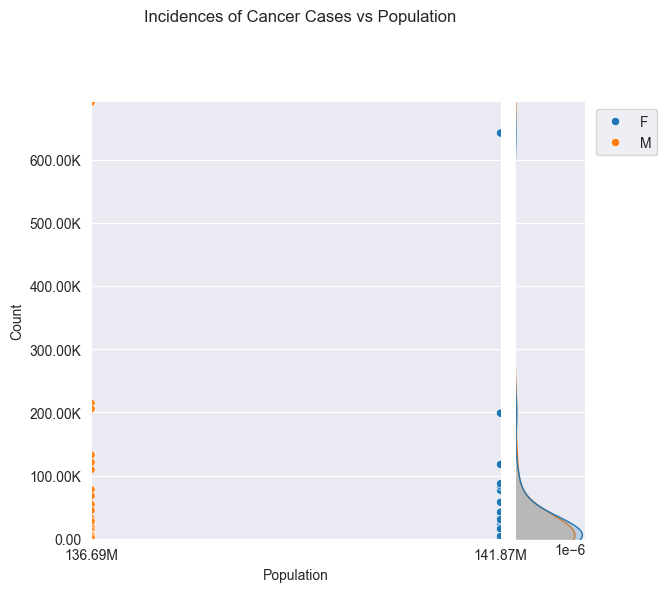

In [247]:
plot = sns.jointplot(data=in_2000_df,
                     x=POPULATION,
                     xlim=(in_2000_df[POPULATION].min(), in_2000_df[POPULATION].max()),
                     y=COUNT,
                     ylim=(in_2000_df[COUNT].min(), in_2000_df[COUNT].max()),
                     hue=SEX)

plot.figure.suptitle('Incidences of Cancer Cases vs Population')
plot.ax_joint.xaxis.set_major_formatter(FORMATTER)
plot.ax_joint.yaxis.set_major_formatter(FORMATTER)
plot.ax_joint.set_xticks(sorted(in_2000_df[POPULATION].unique()))
plot.ax_joint.legend(bbox_to_anchor=(1.4, 1, 0, 0))
plot.ax_marg_x.remove()
save_plot(plot.figure, question_number=5)

By the kernel density estimation, there are two points, one for male and female in the +600K region, that have a low probability.
We also might not want to consider the columns; All Invasive Cancer Sites Combined, Invalid Value(s), Miscellaneous, so i will just use the cancer system sites I created and ignore the misc column

In [248]:
in_2000_df = cancer_df[
    (cancer_df[YEAR] == 2000) &
    (cancer_df[CANCER_SYSTEM_SITES] != MISC)
    ].sort_values([CANCER_SYSTEM_SITES, SEX]).reset_index()[[CANCER_SYSTEM_SITES, SEX, POPULATION, COUNT]]

in_2000_df.head(3)

,Cancer System Sites,Sex,Population,Count
0,Blood & Lymphatic,F,141865770,28490
1,Blood & Lymphatic,F,141865770,3491
2,Blood & Lymphatic,F,141865770,3357


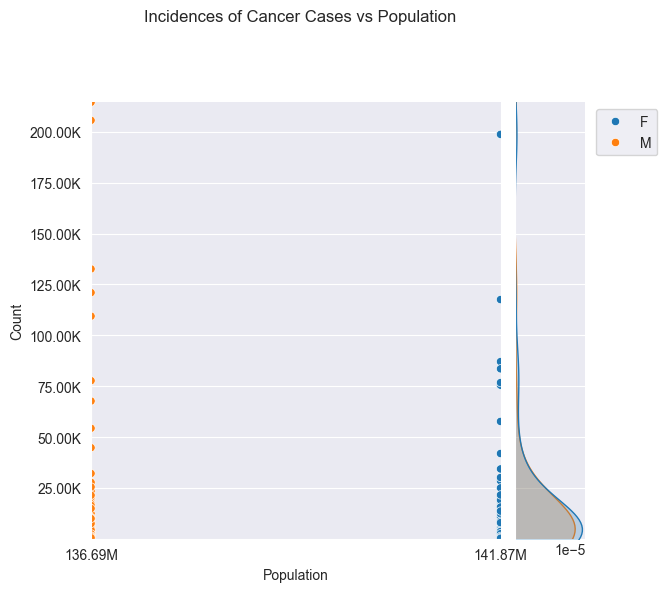

In [249]:
plot = sns.jointplot(data=in_2000_df,
                     x=POPULATION,
                     xlim=(in_2000_df[POPULATION].min(), in_2000_df[POPULATION].max()),
                     y=COUNT,
                     ylim=(in_2000_df[COUNT].min(), in_2000_df[COUNT].max()),
                     hue=SEX)

plot.figure.suptitle('Incidences of Cancer Cases vs Population')
plot.ax_joint.xaxis.set_major_formatter(FORMATTER)
plot.ax_joint.yaxis.set_major_formatter(FORMATTER)
plot.ax_joint.set_xticks(sorted(in_2000_df[POPULATION].unique()))
plot.ax_joint.legend(bbox_to_anchor=(1.4, 1, 0, 0))
plot.ax_marg_x.remove()
save_plot(plot.figure, question_number=5)

Most of the cancer cases lie between 0-25k for populations 136.69M in Males and 142.87 in Females

# 6. Bar plot for each site

Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000

In [250]:
sites_df = cancer_df[
    (cancer_df[SEX] == MALE) &
    (cancer_df[YEAR] == 2000) &
    (cancer_df[CANCER_SITES] != ALL_INVASIVE_CANCER_SITES_COMBINED)
].groupby([CANCER_SITES])[COUNT].sum().reset_index(name=SUM_COUNT)
sites_df.head()

,Cancer Sites,Sum(Count)
0,Acute Lymphocytic Leukemia,2261
1,Acute Monocytic Leukemia,328
2,Acute Myeloid Leukemia,5807
3,"Aleukemic, Subleukemic and NOS",715
4,"Anus, Anal Canal and Anorectum",1485


/var/folders/2p/bfr58x5j3q7bhsbb77vmqxbw0000gn/T/ipykernel_1482/1322426407.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90, fontsize=12)


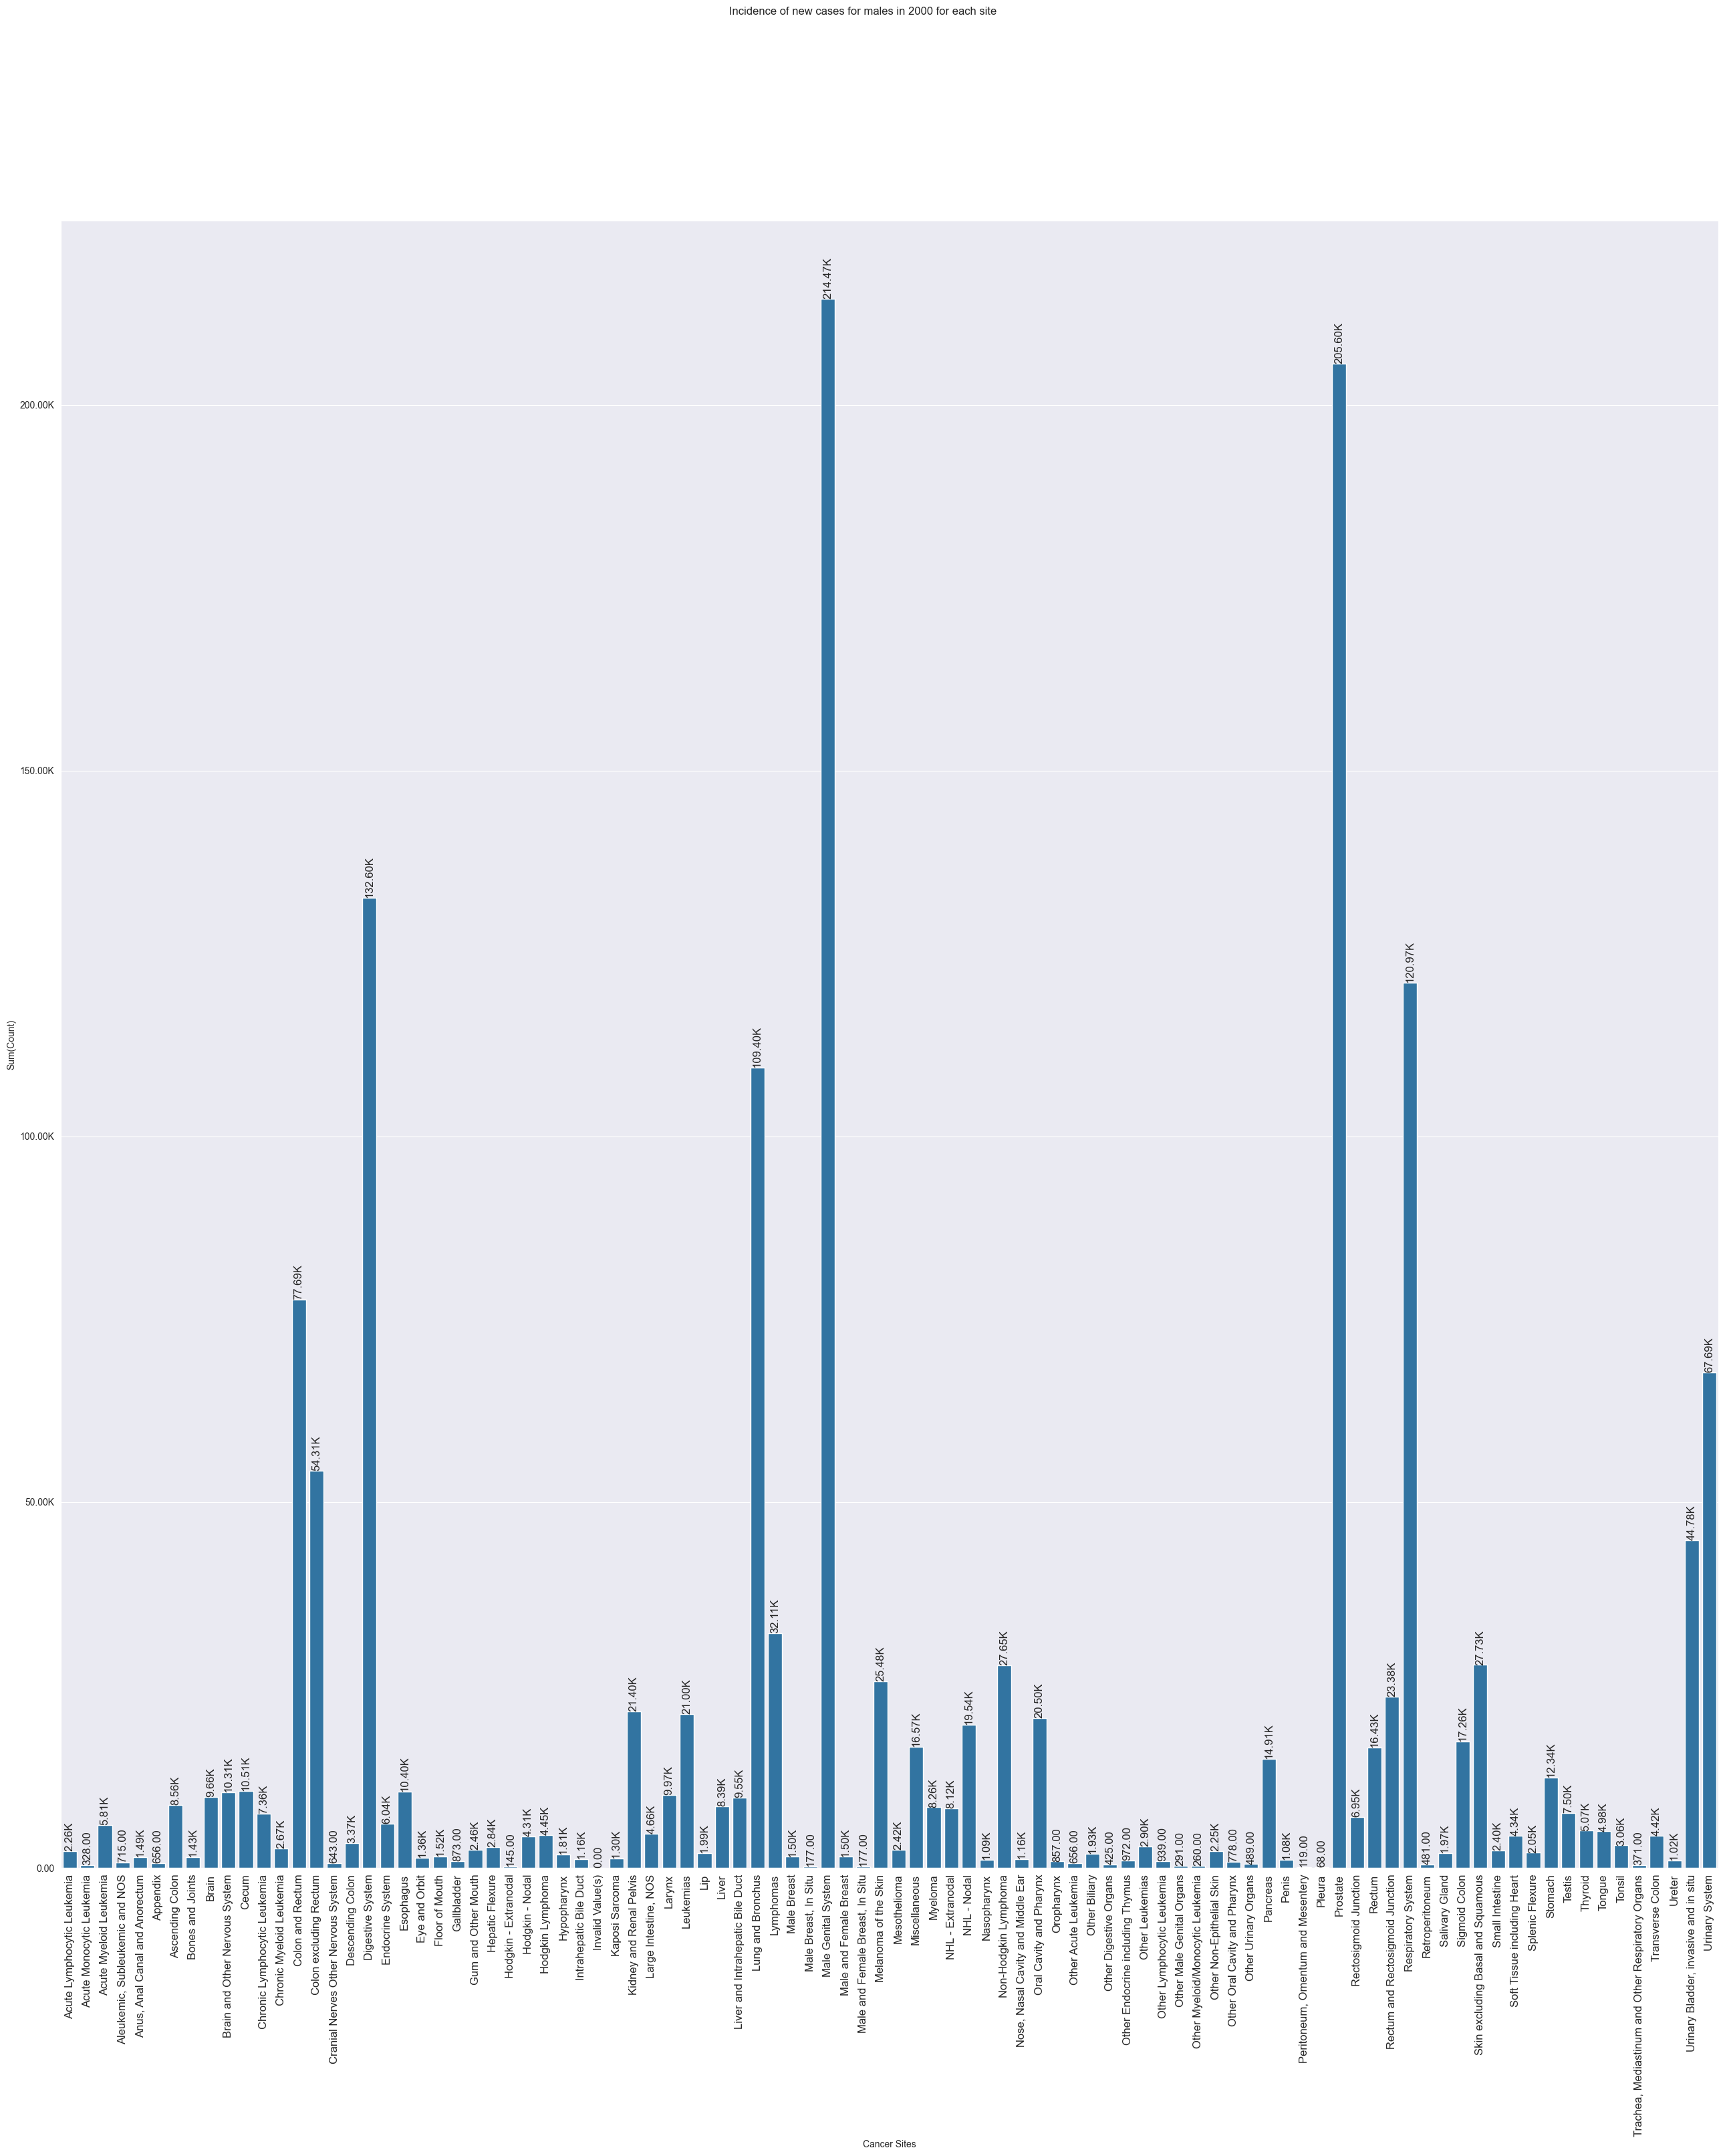

In [251]:
plt.figure(figsize=(32, 32))
plot = sns.barplot(data=sites_df, x=CANCER_SITES, y=SUM_COUNT)
plot.figure.suptitle('Incidence of new cases for males in 2000 for each site')
plot.yaxis.set_major_formatter(FORMATTER)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, fontsize=12)

#add values to the graph / annotations
for bar in plot.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plot.text(x=x, y=y, s=FORMATTER(y), ha='center', va='bottom', fontsize=12, rotation=90)

save_plot(plot.figure, question_number=6)

It looks like prostate and male genital system have most cases with cancer. The Digestive system and respiratory system also have alarming high amounts of cases.

Also there about +100 different sites, so we will use the mapping we made earlier and exclude miscellaneous, to see if we can find anything else.

In [252]:
system_sites_df = cancer_df[
    (cancer_df[SEX] == MALE) &
    (cancer_df[YEAR] == 2000) &
    (cancer_df[CANCER_SYSTEM_SITES] != MISC)
].groupby([CANCER_SYSTEM_SITES])[COUNT].sum().reset_index(name=SUM_COUNT)
system_sites_df

,Cancer System Sites,Sum(Count)
0,Blood & Lymphatic,150775
1,Digestive,471135
2,Endocrine,12074
3,Integumentary,55468
4,Muscular,4345
5,Nervous,21981
6,Reproductive,432288
7,Respiratory,244361
8,Skeletal,1426
9,Urinary,135370


/var/folders/2p/bfr58x5j3q7bhsbb77vmqxbw0000gn/T/ipykernel_1482/2953486660.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(x_labels, rotation=90)


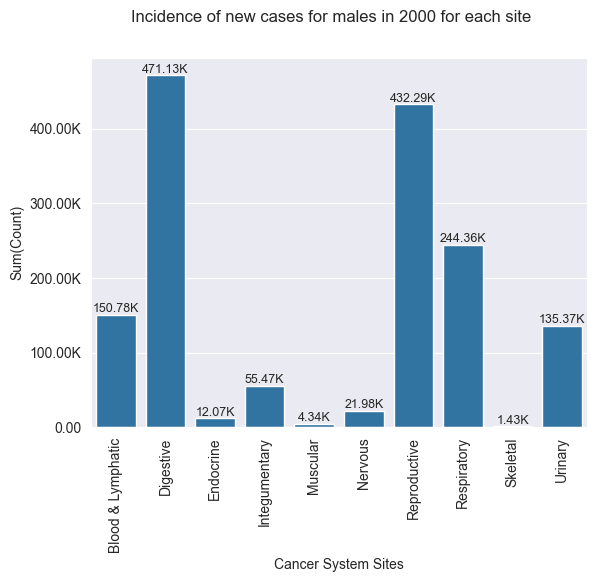

In [253]:
plot = sns.barplot(data=system_sites_df,
                   x=CANCER_SYSTEM_SITES,
                   y=SUM_COUNT)

plot.figure.suptitle('Incidence of new cases for males in 2000 for each site')
plot.yaxis.set_major_formatter(FORMATTER)
x_labels = plot.get_xticklabels()
plot.set_xticklabels(x_labels, rotation=90)

#add values to the graph / annotations
for bar in plot.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plot.text(x=x,
              y=y,
              s=FORMATTER(y),
              ha='center',
              va='bottom',
              fontsize=9)

save_plot(plot.figure, question_number=6)

This plot also agrees with above except that the total number cases in the digestive system is higher than total number of cases in reproductive.

# 7. Higher Incidence Between Sexes

For each cancer site and each year, determine whether males or females had the higher incidence

In [254]:
sites_by_year_sites_sex_df = cancer_df.groupby([YEAR, CANCER_SITES, SEX])[COUNT].sum().reset_index(name=SUM_COUNT)
sites_by_year_sites_sex_df

,Year,Cancer Sites,Sex,Sum(Count)
0,1999,Acute Lymphocytic Leukemia,F,1652
1,1999,Acute Lymphocytic Leukemia,M,2188
2,1999,Acute Monocytic Leukemia,F,249
3,1999,Acute Monocytic Leukemia,M,300
4,1999,Acute Myeloid Leukemia,F,4648
...,...,...,...,...
4626,2022,Urinary System,F,45260
4627,2022,Urinary System,M,106289
4628,2022,"Uterus, NOS",F,2080
4629,2022,Vagina,F,1394


In [255]:
highest_incidences_by_year_sites_df = sites_by_year_sites_sex_df.loc[
    sites_by_year_sites_sex_df.groupby([YEAR, CANCER_SITES])[SUM_COUNT].idxmax()
].reset_index(drop=True)
highest_incidences_by_year_sites_df

,Year,Cancer Sites,Sex,Sum(Count)
0,1999,Acute Lymphocytic Leukemia,M,2188
1,1999,Acute Monocytic Leukemia,M,300
2,1999,Acute Myeloid Leukemia,M,5352
3,1999,"Aleukemic, Subleukemic and NOS",M,736
4,1999,All Invasive Cancer Sites Combined,M,672530
...,...,...,...,...
2515,2022,"Urinary Bladder, invasive and in situ",M,58506
2516,2022,Urinary System,M,106289
2517,2022,"Uterus, NOS",F,2080
2518,2022,Vagina,F,1394


Above is the dataframe for which sex had the greater number of cases for each cancer site

# 8. Pivot table for cancer / year

Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

In [256]:
pivot_df = pd.pivot_table(
    cancer_df,
    index=CANCER_SITES,
    columns=YEAR,
    values=COUNT,
    aggfunc='sum')
pivot_df

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cancer Sites,,,,,,,,,,,,,,,,,,,,,
Acute Lymphocytic Leukemia,3840,4049,4159,4122,4208,4429,4342,4550,4678,4884,...,4872,5091,5396,5416,5403,5705,5585,5545,5434,5439
Acute Monocytic Leukemia,549,590,690,704,767,783,774,767,934,823,...,678,684,698,688,665,673,631,571,548,446
Acute Myeloid Leukemia,10000,10644,10776,10452,10844,10901,10737,11060,11200,11644,...,14955,15521,15344,15706,15742,16405,16971,16604,17135,17266
"Aleukemic, Subleukemic and NOS",1385,1403,1390,1412,1512,1507,1569,1603,1820,1771,...,2379,2336,2427,2127,2235,2367,2313,2368,2446,2248
All Invasive Cancer Sites Combined,1304271,1332566,1377750,1394720,1408190,1431604,1460548,1496800,1542471,1565155,...,1640952,1667957,1713267,1740066,1774849,1806799,1858563,1718755,1869872,1851238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Urinary Bladder, invasive and in situ",59051,60389,60862,62138,63836,65631,66706,65849,67731,68898,...,74645,75838,76475,77151,78207,77801,78932,74953,79510,76529
Urinary System,94493,97794,100484,103705,108290,112325,115844,117595,121451,125054,...,137170,140841,144305,146994,150071,151149,155416,145779,155747,151549
"Uterus, NOS",1173,1236,1244,1276,1313,1246,1297,1266,1293,1445,...,1685,1874,1936,1963,1927,2063,2244,2029,2280,2080


Above is the total sum of cancer incidence per site in each year wide format